In [1]:
from preprocessing import load_data, extract_freqs, extract_tfidf
import topic_mining

In [2]:
df = load_data()

Attempting to load normalized dataset...
Returning normalized dataset.


In [3]:
df.head(10)

,IDNew,SocialNetwork,SenderUserId,FollowersCount,Message,CreatedTime,MessageType,NormalizedMessage
0,4.158647e+09,TWITTER,1.150201e+18,99,Hey @NavyFederalHelp @NavyFederal are you guys...,2020-01-30 19:09:07.795,Twitter Mention,hey are you guys compatible with the security ...
1,4.158647e+09,TWITTER,1.150201e+18,99,Hey @NavyFederalHelp @NavyFederal are you guys...,2020-01-30 19:09:07.795,Twitter Mention,hey are you guys compatible with the security ...
2,4.131474e+09,TWITTER,8.765216e+17,407,@NavyFederal You’re welcome. Tons of locals wi...,2020-01-30 19:07:55.126,Twitter Reply,you are welcome tons of locals with nf in the ...
3,4.131474e+09,TWITTER,8.765216e+17,407,@NavyFederal please put a location in Daytona ...,2020-01-30 19:01:02.803,Twitter Mention,please put a location in daytona thanks
4,2.066183e+09,TWITTER,9.404094e+08,1079,@NavyFederal i’m bout SICK of yall.,2020-01-30 17:53:31.435,Twitter Mention,i am bout sick of yall
5,2.110529e+09,TWITTER,1.465241e+09,109125,Davide Moretti drove his way through the lane ...,2020-01-30 17:20:00.257,Twitter Mention,davide moretti drove his way through the lane ...
6,1.985451e+09,TWITTER,4.194737e+08,3755,@TheNCUA how is it @NavyFederal can disable a...,2020-01-30 17:09:14.505,Twitter Mention,how is it can disable all tabs and disable my ...
7,4.162829e+09,TWITTER,1.199326e+18,1,@defenseupdate @IDFSpokesperson @chicagoGDC @H...,2020-01-30 17:00:29.424,Twitter Mention,defense apac pga
8,1.985451e+09,TWITTER,4.194737e+08,3755,Gee Navy Federal Is A Bank Of Be Best Aint it ...,2020-01-30 17:00:11.694,Twitter Mention,gee navy federal is a bank of be best aint it ...
9,1.958612e+09,TWITTER,3.207328e+08,993,@mac_10k @NavyFederal We good here. Thanks but...,2020-01-30 16:37:24.573,Twitter Mention,k we good here thanks but no thanks


In [5]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english')) + ["navy", "federal", "com", "twitter"]

doc_term_mat, co_occ_mat, cvec = extract_tfidf(df.NormalizedMessage.astype(str), stop_words=stop_words, max_features=1000, min_df=0.05)

In [6]:
long_messages = df.NormalizedMessage.astype(str)[df.NormalizedMessage.astype(str).apply(lambda s: len(s.split(' '))>8)]#.head(1000)
len(long_messages)

156213

In [9]:
import time
start = time.time()
topics = topic_mining.extract_topics_lda(cvec, long_messages)
print("Took " + str(time.time()-start) + " to extract topics!")

Took 83.21387815475464 to extract topics!


In [10]:
topics

[['need',
  'would',
  'help',
  'know',
  'account',
  'one',
  'like',
  'time',
  'money',
  'us'],
 ['money',
  'card',
  'credit',
  'get',
  'would',
  'account',
  'nfcu',
  'time',
  'call',
  'like'],
 ['credit',
  'union',
  'would',
  'us',
  'service',
  'account',
  'like',
  'thank',
  'nfcu',
  'call'],
 ['get',
  'call',
  'help',
  'us',
  'need',
  'would',
  'time',
  'account',
  'like',
  'one'],
 ['thank',
  'service',
  'would',
  'us',
  'like',
  'time',
  'call',
  'help',
  'account',
  'nfcu'],
 ['thanks',
  'know',
  'us',
  'would',
  'like',
  'please',
  'help',
  'time',
  'service',
  'account'],
 ['nfcu',
  'like',
  'help',
  'would',
  'us',
  'account',
  'one',
  'time',
  'service',
  'credit'],
 ['cards',
  'one',
  'would',
  'credit',
  'card',
  'like',
  'time',
  'us',
  'call',
  'account'],
 ['us',
  'please',
  'call',
  'would',
  'like',
  'help',
  'account',
  'thanks',
  'time',
  'card'],
 ['account',
  'time',
  'would',
  'call',

<h4>

In [1]:
from gensim.models import Word2Vec

In [2]:
from nltk.corpus import abc
import nltk
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [3]:
model= Word2Vec(abc.sents())
#X= list(model.wv.vocab)
#data=model.most_similar('science')

<ipython-input-4-b7598cdfbf81>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


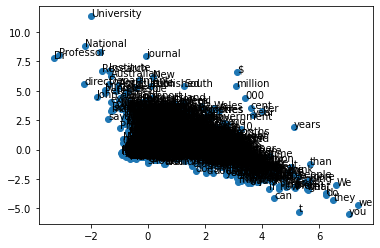

In [4]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [9]:
doc_term_mat, co_occ_mat, cvec = extract_tfidf(df.NormalizedMessage.astype(str), stop_words=stop_words, max_features=1000, min_df=0.05)
clusters = topic_mining.compute_clusters(doc_term_mat)

In [23]:
import numpy, pandas

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans

from nltk.corpus import stopwords

docs = pandas.read_csv('../../data/dataset.csv').NormalizedMessage.astype(str)
stop_words = list(stopwords.words('english'))
vec = TfidfVectorizer(stop_words=stop_words)
doc_term_mat = vec.fit_transform(docs)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(doc_term_mat)